### This notebook concatenates the depth images and the flight images and then turns them into a gif or webp or whatever else you may like

In [210]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import re
# Add the parent directory to the system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

In [211]:
def sort_key(filename):
    numbers = re.findall(r'\d+', filename)
    return [int(num) for num in numbers]

In [212]:
#loading of data
#exp32 - random #cave 47 #deadend 4
#exp10005 - locked_conv
exp_dir = 'Experiment 10005' 
test_scen = "house_hard_obstacles"
test_nr = 7
agent = "random"

retrieve_depth_maps_path = os.path.join(parent_dir, 'log', 'LV_VAE_MESH-v0', exp_dir , test_scen, "tests", f"test{test_nr}", "depth_maps", "depth_map_*.png")
retrieve_flight_imgs_path = os.path.join(parent_dir, 'plotting', 'replotting_results', "follow_quad_imgs" , test_scen, f"test{test_nr}", "scene_timestep_*.png")

output_path = os.path.join(parent_dir, 'plotting', 'replotting_results', "depth_and_flight" , agent, test_scen)
os.makedirs(output_path, exist_ok=True)


In [213]:
#load one empty depth map to pad when no depth map is available
edm_path = os.path.join(parent_dir, 'plotting', 'replotting_results',"empty_depth_map.png")
empty_depth_map = cv2.imread(edm_path, cv2.IMREAD_UNCHANGED)
empty_depth_map = cv2.cvtColor(empty_depth_map, cv2.COLOR_BGR2RGB)
#display empty depth map
# plt.imshow(empty_depth_map)


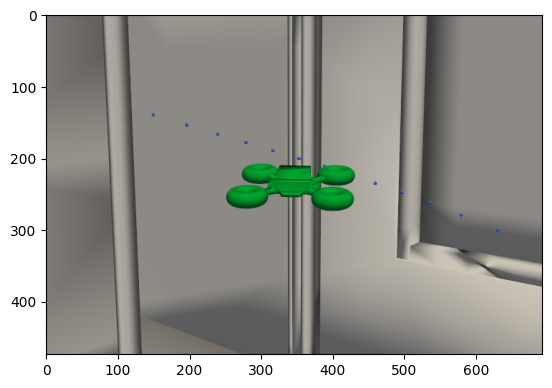

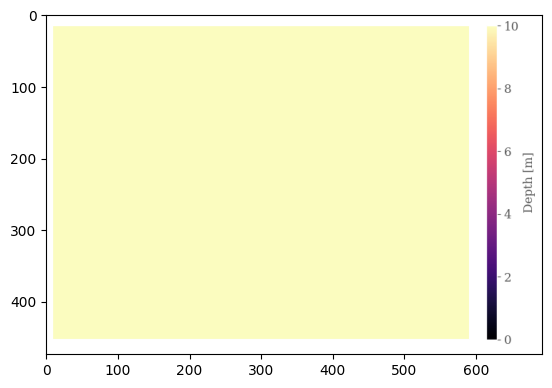

In [214]:
# Load the depth maps
depth_maps = []
flight_imgs = []

depth_map_files = sorted(glob.glob(retrieve_depth_maps_path), key=sort_key)
flight_img_files = sorted(glob.glob(retrieve_flight_imgs_path), key=sort_key)

if len(depth_map_files) != len(flight_img_files):
    dm_indices = []
    for p in depth_map_files:
        dm_indices.append(sort_key(p)[3])

    for flight_img_path in flight_img_files:
        flight_img_num = sort_key(flight_img_path)[1]+1 #+1 since depth maps start at 1

        if flight_img_num in dm_indices:
            depth_map_path = depth_map_files[dm_indices.index(flight_img_num)]
            depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)
            depth_map = cv2.cvtColor(depth_map, cv2.COLOR_BGR2RGB)
        else:
            depth_map = empty_depth_map

        flight_img = cv2.imread(flight_img_path, cv2.IMREAD_UNCHANGED)
        flight_img = cv2.cvtColor(flight_img, cv2.COLOR_BGR2RGB)

        depth_maps.append(depth_map)
        flight_imgs.append(flight_img)   
else:
    for depth_map_path in depth_map_files:
        depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)
        depth_map = cv2.cvtColor(depth_map, cv2.COLOR_BGR2RGB)
        depth_maps.append(depth_map)

    for flight_img_path in flight_img_files:
        flight_img = cv2.imread(flight_img_path, cv2.IMREAD_UNCHANGED)
        flight_img = cv2.cvtColor(flight_img, cv2.COLOR_BGR2RGB)
        flight_imgs.append(flight_img)

plt.figure()
plt.imshow(flight_imgs[0])

plt.figure()
plt.imshow(depth_maps[0])

In [215]:
#Ensure that the number of depth maps and flight images are the same
assert len(depth_maps) == len(flight_imgs)

In [216]:
#concatenate the images side by side
for i in range(len(depth_maps)):
    depth_map = depth_maps[i]
    flight_img = flight_imgs[i]
    combined_img = np.concatenate((depth_map, flight_img), axis=1)
    combined_img = cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(output_path, f"combined_img_{i}.png"), combined_img)

In [217]:
#Gif creation
import imageio.v3 as iio
mode = "gif" #gif or webp
path_pattern = os.path.join(output_path,'combined_img_*.png')
print(path_pattern)
filenames = sorted(glob.glob(path_pattern), key=sort_key)

if mode == "gif":
    print("There are ", len(filenames), " images in the folder\nBeginning to create gif... ",end="")
    
    format = ".gif" 
    animation_output_path = test_scen + format
    iio.imwrite(animation_output_path, [iio.imread(fp) for fp in filenames],
                    fps=30,  # Frames per second
                    loop=0,  # 0 = infinite loop, 1 = no loop
                    quantizer="nq",
                    )
    print("GIF created successfully!")

elif mode == "webp":
    print("There are ", len(filenames), " images in the folder\nBeginning to create webp animation... ",end="")

    format = ".webp" 
    animation_output_path = test_scen + format
    iio.imwrite(animation_output_path, [iio.imread(fp) for fp in filenames],
                    fps=30,  # Frames per second
                    loop=0,  # 0 = infinite loop, 1 = no loop
                    quantizer="nq",
                    )

    print("WebP animation created successfully!")   

c:\Users\admin\Desktop\EirikJorgenMasterCode\gym_quad\plotting\replotting_results\depth_and_flight\random\house_hard_obstacles\combined_img_*.png
There are  203  images in the folder
Beginning to create gif... GIF created successfully!
